In [3]:
pip install keras_ocr -q

## Import Library

In [45]:
import os
import shutil
import csv
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import string


import cv2
import keras_ocr
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Define the training and validation base directories
img_dir = '/content/drive/MyDrive/bg udh bg/image'
validation_dir = '/content/drive/MyDrive/bg udh bg/eval_set'
img_csv = '/content/drive/MyDrive/bg udh bg/image/DataTrain.csv'
train_folder = '/content/drive/MyDrive/bg udh bg/train_img'
test_folder = '/content/drive/MyDrive/bg udh bg/test_img'

In [7]:
img_df = pd.read_csv(img_csv, sep = ';', index_col=0)
img_df.head()

,Vehicleregistrationplate,NameofFile
0,A7814,DataTrain1.png
1,B1074QO,DataTrain2.png
2,B1031QO,DataTrain3.png
3,B187EDA,DataTrain4.png
4,B1089VD,DataTrain5.png


## [JANGAN DI RUN LAGI KALO PERNAH DI RUN] Split Data into training and testing

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(img_df, test_size=0.2, random_state=64)

In [ ]:
# Move the images to the corresponding folders
for index, row in train_data.iterrows():
    image_name = row['NameofFile']
    source_path = os.path.join(img_dir, image_name)
    destination_path = os.path.join(train_folder, image_name)
    shutil.copy(source_path, destination_path)

for index, row in test_data.iterrows():
    image_name = row['NameofFile']
    source_path = os.path.join(img_dir, image_name)
    destination_path = os.path.join(test_folder, image_name)
    shutil.copy(source_path, destination_path)

In [ ]:
train_data.to_csv('/content/drive/MyDrive/bg udh bg/train_data.csv')
test_data.to_csv('/content/drive/MyDrive/bg udh bg/test_data.csv')

## Pre-processing

In [8]:
train_data = pd.read_csv('/content/drive/MyDrive/bg udh bg/train_data.csv', index_col=0)
test_data = pd.read_csv('/content/drive/MyDrive/bg udh bg/test_data.csv', index_col=0)

In [9]:
def img_path(dir, df):
  image_paths = []
  for index, row in df.iterrows():
      image_name = row['NameofFile']
      image_path = os.path.join(dir, image_name)
      image_paths.append(image_path)

  return image_paths

In [10]:
train_path = img_path(train_folder, train_data)
test_path = img_path(test_folder, test_data)

In [11]:
train_path[:10]

['/content/drive/MyDrive/bg udh bg/train_img/DataTrain625.png',
 '/content/drive/MyDrive/bg udh bg/train_img/DataTrain270.png',
 '/content/drive/MyDrive/bg udh bg/train_img/DataTrain325.png',
 '/content/drive/MyDrive/bg udh bg/train_img/DataTrain611.png',
 '/content/drive/MyDrive/bg udh bg/train_img/DataTrain728.png',
 '/content/drive/MyDrive/bg udh bg/train_img/DataTrain124.png',
 '/content/drive/MyDrive/bg udh bg/train_img/DataTrain783.png',
 '/content/drive/MyDrive/bg udh bg/train_img/DataTrain265.png',
 '/content/drive/MyDrive/bg udh bg/train_img/DataTrain360.png',
 '/content/drive/MyDrive/bg udh bg/train_img/DataTrain185.png']

In [12]:
def preprocess_img(img_path) :
  data = []
  for ind in range(len(img_path)):
      image = img_path[ind]
      img_arr = cv2.imread(image)
      h,w,d = img_arr.shape
      # prepprocesing
      load_image = load_img(image,target_size=(224,324))
      load_image_arr = img_to_array(load_image)
      # norm_load_image_arr = load_image_arr/255.0 # normalization
      # -------------- append
      data.append(load_image_arr)

  return data

In [13]:
pp_train = preprocess_img(train_path)
pp_test = preprocess_img(test_path)

In [14]:
X_train = np.array(pp_train,dtype=np.float32)
X_test = np.array(pp_test,dtype=np.float32)

In [15]:
X_train.shape, X_test.shape

((640, 224, 324, 3), (160, 224, 324, 3))

In [16]:
y_train = np.array(train_data.Vehicleregistrationplate.tolist())
y_test = np.array(test_data.Vehicleregistrationplate.tolist())

In [17]:
y_train

array(['B1626KJM', 'B1040UN', 'AG8157U', 'B1006UL', 'B1543VOS',
       'B1305AMI', 'B1512NRN', 'B1260UL', 'B1487VD', 'B1157SSL', 'AG815U',
       'B1028QO', 'B1484QH', 'B1020ERF', 'A1565E', 'AD1164HU', 'B1770TKL',
       'B1830DFD', 'AD8888KJ', 'B1774TIT', 'AG1855VX', 'B1164EMZ',
       'AD8746OF', 'B1122HL', 'B1549RFS', 'AB1288RE', 'AD8746OF',
       'AB2532QU', 'B1242VMC', 'B1330VD', 'B1321GQ', 'B139RFS', 'B1339UL',
       'B1594ULP', 'B1330NK', 'B1289QQ', 'B1763QT', 'B1124SQ', 'B1596ELO',
       'B1562PI', 'AB1449KB', 'B1101KJO', 'B102HHB', 'B1964VD', 'B1980VD',
       'B1225FIS', 'B1074QO', 'B1946TKN', 'B1311UVL', 'A8014VA',
       'B1538ELS', 'AB6213QF', 'B1468TYU', 'B1486RFS', 'B1242VMC',
       'A5822BG', 'B1050VKK', 'B1245UVK', 'B1339UL', 'B1209BOE',
       'B1389TJT', 'B1738VFV', 'B1860KQ', 'B1840TJK', 'B1855SL0',
       'B1913TIS', 'AD1164HU', 'B1174NRQ', 'B1045WMU', 'AB2491TQ',
       'B1322BFD', 'B1697SJO', 'B1972RBP', 'AD9077PR', 'B1358VLP',
       'AE2593NZ', 'AB6018HU', 

In [18]:
X_train

array([[[[ 29.,  26.,  33.],
         [ 29.,  26.,  33.],
         [ 28.,  25.,  32.],
         ...,
         [ 36.,  35.,  41.],
         [ 35.,  34.,  40.],
         [ 35.,  34.,  40.]],

        [[ 29.,  26.,  33.],
         [ 29.,  26.,  33.],
         [ 28.,  25.,  32.],
         ...,
         [ 36.,  35.,  41.],
         [ 35.,  34.,  40.],
         [ 35.,  34.,  40.]],

        [[ 29.,  26.,  33.],
         [ 29.,  26.,  33.],
         [ 28.,  25.,  32.],
         ...,
         [ 32.,  31.,  37.],
         [ 31.,  30.,  36.],
         [ 31.,  30.,  36.]],

        ...,

        [[ 44.,  47.,  54.],
         [ 46.,  49.,  56.],
         [ 49.,  52.,  59.],
         ...,
         [ 43.,  46.,  55.],
         [ 45.,  48.,  57.],
         [ 46.,  49.,  58.]],

        [[ 38.,  41.,  48.],
         [ 40.,  43.,  50.],
         [ 43.,  46.,  53.],
         ...,
         [ 49.,  52.,  61.],
         [ 50.,  53.,  62.],
         [ 51.,  54.,  63.]],

        [[ 38.,  41.,  48.],
       

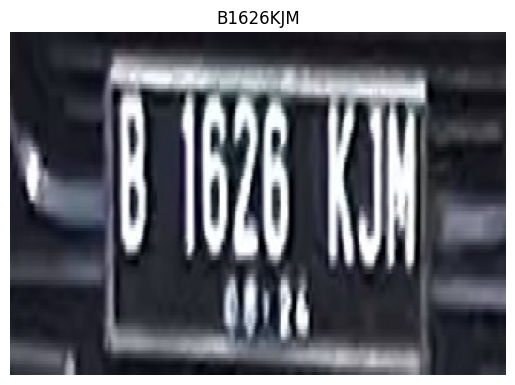

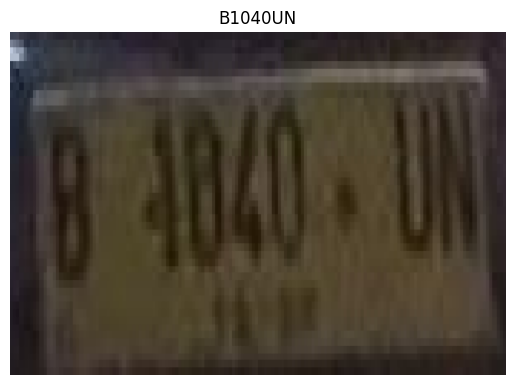

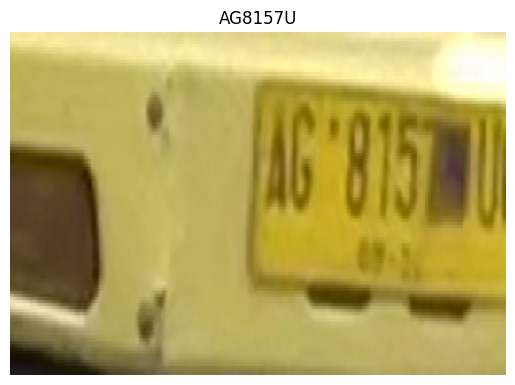

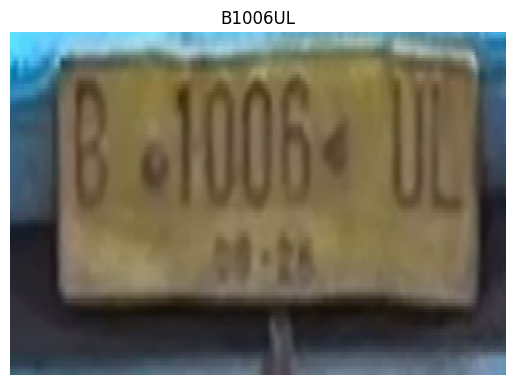

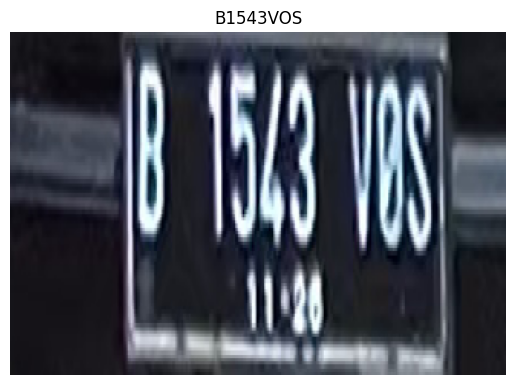

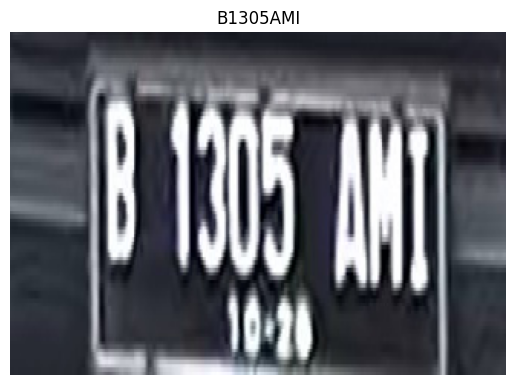

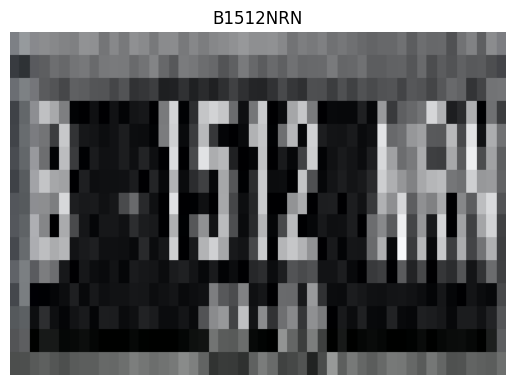

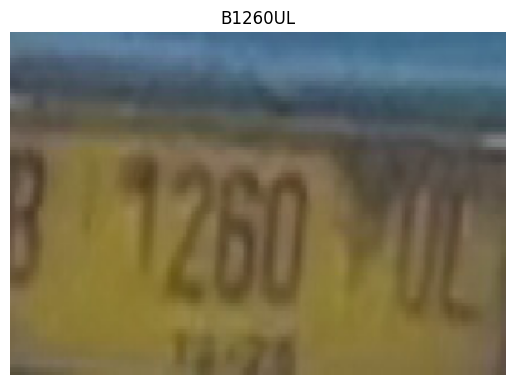

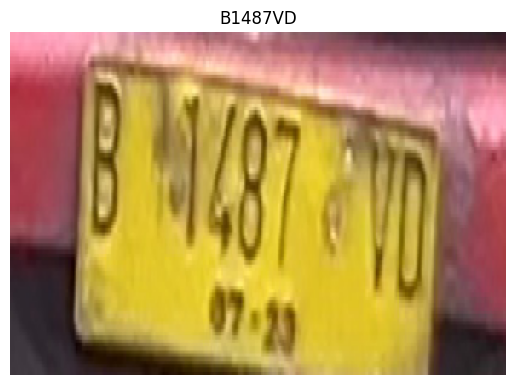

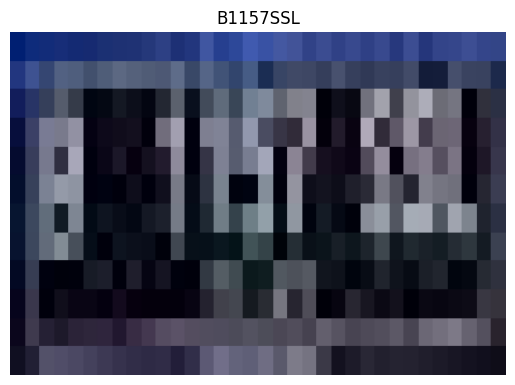

In [19]:
# Select the top 10 images and labels
top_images = X_train[:10]
top_labels = y_train[:10]

# Iterate over the top images and labels
for image, label in zip(top_images, top_labels):
    # Convert the image from array format to image format
    img = image.astype('uint8')

    # Display the image
    plt.imshow(img)
    plt.title(label)  # Set the label as the title
    plt.axis('off')  # Remove axis ticks and labels
    plt.show()

In [20]:
# def train_val_generators(training_images, training_labels, validation_images, validation_labels):

#   train_datagen = ImageDataGenerator(rescale=1.0/255.,
#                                      rotation_range=40,
#                                      shear_range=0.2,
#                                      horizontal_flip=True,
#                                      fill_mode='nearest')


#   # Pass in the appropriate arguments to the flow method
#   train_generator = train_datagen.flow(x=training_images,
#                                        y=training_labels,
#                                        batch_size=32)


#   # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
#   # Remember that validation data should not be augmented
#   validation_datagen = ImageDataGenerator(rescale=1.0/255.)

#   # Pass in the appropriate arguments to the flow method
#   validation_generator = validation_datagen.flow(x=validation_images,
#                                                  y=validation_labels,
#                                                  batch_size=32)

#   return train_generator, validation_generator

In [21]:
# # Test your generators
# train_generator, test_generator = train_val_generators(X_train, y_train, X_test, y_test)

# print(f"Images of training generator have shape: {train_generator.x.shape}")
# print(f"Labels of training generator have shape: {train_generator.y.shape}")
# print(f"Images of validation generator have shape: {test_generator.x.shape}")
# print(f"Labels of validation generator have shape: {test_generator.y.shape}")

Images of training generator have shape: (640, 224, 324, 3)
Labels of training generator have shape: (640,)
Images of validation generator have shape: (160, 224, 324, 3)
Labels of validation generator have shape: (160,)


## Transfer Learning

In [ ]:
alphabet = string.digits + string.ascii_uppercase
recognizer_alphabet = ''.join(sorted(set(alphabet)))

In [ ]:
recognizer_alphabet

'0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [ ]:
detector = keras_ocr.detection.Detector(weights='clovaai_general')
recognizer = keras_ocr.recognition.Recognizer(alphabet=recognizer_alphabet,
                                              weights='kurapan')

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for /root/.keras-ocr/crnn_kurapan_notop.h5


In [ ]:
max_length = 9
recognition_image_generators = [
    keras_ocr.data_generation.convert_image_generator_to_recognizer_input(
        image_generator=test_gen,
        max_string_length=min(recognizer.training_model.input_shape[1][1], max_length),
        target_width=recognizer.model.input_shape[2],
        target_height=recognizer.model.input_shape[1],
        margin=1
    ) for test_gen in test_generator
]

# See what the first validation image for recognition training looks like.
image, text = next(recognition_image_generators[1])
print('This image contains:', text)
plt.imshow(image)

## Pre-trained

In [22]:
import imgaug

In [ ]:
image_paths = img_path(img_dir, img_df)
image_paths

In [ ]:
labels = img_df.Vehicleregistrationplate.tolist()
labels_lower = [s.lower() for s in labels]
labels_lower

In [37]:
formatted_data = [(image_path, None, labels_lower) for image_path, label in zip(image_paths, labels_lower)]

In [61]:
detector = keras_ocr.detection.Detector(weights='clovaai_general')
recognizer = keras_ocr.recognition.Recognizer()
recognizer.compile()
for layer in recognizer.backbone.layers:
    layer.trainable = False

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [62]:
for layer in recognizer.backbone.layers:
    print(layer)

In [63]:
batch_size = 8
augmenter = imgaug.augmenters.Sequential([
    imgaug.augmenters.GammaContrast(gamma=(0.25, 3.0)),
])

train_labels, validation_labels = train_test_split(formatted_data, test_size=0.2, random_state=42)
(training_image_gen, training_steps), (validation_image_gen, validation_steps) = [
    (
        keras_ocr.datasets.get_recognizer_image_generator(
            labels=labels,
            height=recognizer.model.input_shape[1],
            width=recognizer.model.input_shape[2],
            alphabet=recognizer.alphabet,
            augmenter=augmenter
        ),
        len(labels) // batch_size
    ) for labels, augmenter in [(train_labels, augmenter), (validation_labels, None)]
]

In [64]:
training_gen, validation_gen = [
    recognizer.get_batch_generator(
        image_generator=image_generator,
        batch_size=batch_size
    )
    for image_generator in [training_image_gen, validation_image_gen]
]

In [46]:
recognition_batch_size = 10
recognizer_basepath = os.path.join(train_folder, f'recognizer_{datetime.datetime.now().isoformat()}')

In [53]:
recognizer.training_model.fit(
    training_gen,
    epochs=10,
    steps_per_epoch=training_steps,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=25),
        tf.keras.callbacks.CSVLogger(f'{recognizer_basepath}.csv', append=True),
        tf.keras.callbacks.ModelCheckpoint(filepath=f'{recognizer_basepath}.h5')
    ],
    validation_data=validation_gen,
    validation_steps=validation_steps,
    workers=0,
    batch_size=recognition_batch_size
)

640 / 640 instances have illegal characters.


KeyboardInterrupt: ignored

In [ ]:
image, text = next(training_image_gen)
print('text:', text)
plt.imshow(image)

640 / 640 instances have illegal characters.


In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, restore_best_weights=False),
    tf.keras.callbacks.ModelCheckpoint('recognizer_borndigital.h5', monitor='val_loss', save_best_only=True),
    tf.keras.callbacks.CSVLogger('recognizer_borndigital.csv')
]

recognizer.training_model.fit_generator(
    generator=training_gen,
    steps_per_epoch=training_steps,
    validation_steps=validation_steps,
    validation_data=validation_gen,
    callbacks=callbacks,
    epochs=100,
)

<ipython-input-91-94ad3072afdc>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  recognizer.training_model.fit_generator(


Epoch 1/100


ValueError: ignored